<a href="https://colab.research.google.com/github/djfLtC0dr/python-playground/blob/main/DASC522/djfDASC522_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# importing libraries
import sklearn
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing

# loading the training dataset 
data = pd.read_csv('/LRS_Pre_Assessment_trimmed_rank.csv')
# print(data)

b. Drop the “flight” column and one-hot-encode the “rank” & “gender” *columns*

In [12]:
data.drop(columns=['Flight'], axis=1, inplace=True)
data_encoded = pd.get_dummies(data, columns = ['Rank','Gender'])
# print(data_encoded)

c. Create a Data Understanding table & include 3 Data Understanding visualizations

In [13]:
data_encoded.describe()

,Age,ORS_total,PTSD_score,Sleep_score,survey_Burnout,survey_FitSat,BMI,BodyFatPerc,MusclePerc,APFT_1_is_pass,Rank_JrEnlisted,Rank_SrEnlisted,Rank_officer,Gender_F,Gender_M
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,27.942675,7.620382,9.312102,7.305732,2.140127,3.331210,27.110191,0.294873,0.327968,0.707006,0.452229,0.509554,0.038217,0.242038,0.757962
std,6.164666,1.955621,11.795182,3.939710,0.812235,0.803746,4.093791,0.086974,0.060547,0.456592,0.499305,0.501508,0.192332,0.429688,0.429688
min,19.000000,0.200000,0.000000,0.000000,1.000000,1.000000,18.400000,0.014700,0.036500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,6.700000,1.000000,4.000000,2.000000,3.000000,24.400000,0.248000,0.289000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,26.000000,8.000000,5.000000,7.000000,2.000000,3.000000,27.100000,0.296000,0.334000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,33.000000,9.000000,12.000000,10.000000,2.000000,4.000000,29.700000,0.346000,0.366000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,45.000000,10.000000,68.000000,22.000000,5.000000,5.000000,38.300000,0.495000,0.473000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


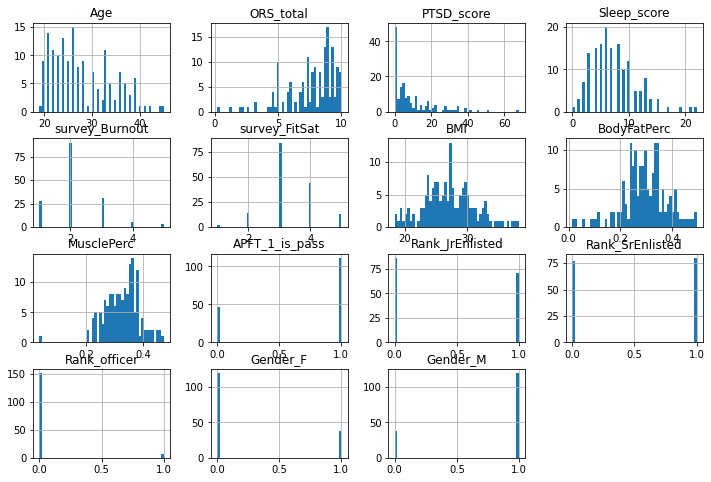

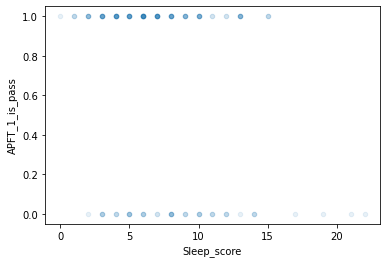

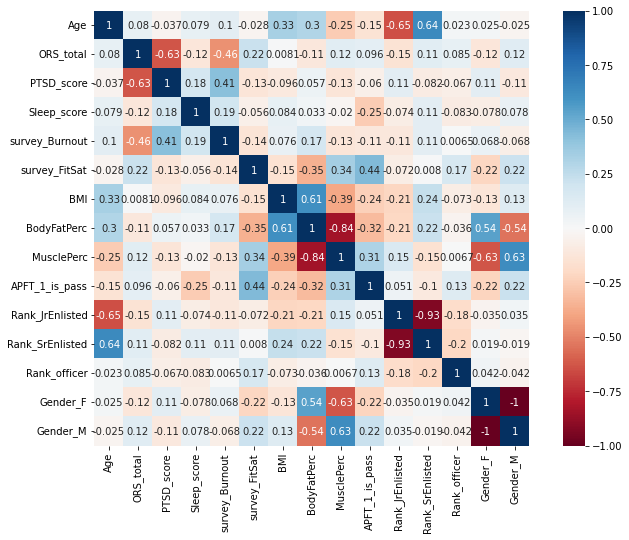

In [14]:
# separate the independent and dependent variables
X = data_encoded.loc[:, data_encoded.columns != 'APFT_1_is_pass']
y = data_encoded.loc[:, data_encoded.columns == 'APFT_1_is_pass']
#X = sm.add_constant(X)
#print(X.columns)

#histplot
data_encoded.hist(bins=50, figsize=(12,8))

# scatterplot by Sleep_score
data_encoded.plot(kind='scatter', x='Sleep_score', y='APFT_1_is_pass', alpha=0.1)
plt.show()

# correlation matrix
corr_matrix = data_encoded.corr()
#apft_corr = np.asarray(corr_matrix['APFT_1_is_pass']).reshape(15,1)
fig, ax = plt.subplots(figsize=(12,8)) 
sns.heatmap(corr_matrix, cmap='RdBu', vmin=-1, vmax=1, annot=True, square=True, ax=ax)


d. Data Preparation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f562fafbd90>,
      dtype=object)

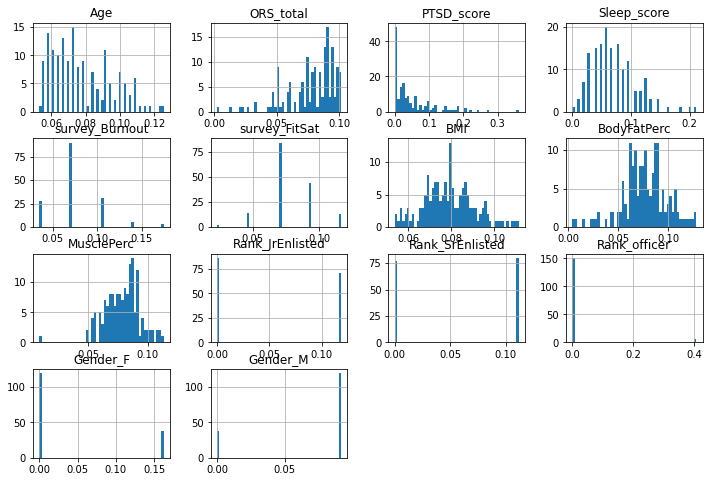

In [15]:
# normalize data
data_normd = preprocessing.normalize(X, axis=0)
col_names = X.columns
normd_df = pd.DataFrame(data_normd, columns=col_names)
#create log-transformed data
#normd_df['Age'] = np.log(normd_df['Age'])
#normd_df['ORS_total'] = np.log(normd_df['ORS_total'])
#normd_df['PTSD_score'] = np.log(normd_df['PTSD_score'])
#data_log = np.log(data)
#histplot
normd_df.hist(bins=50, figsize=(12,8))

e. Modeling

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
# split un-normd data into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

# split normd data into train test sets
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(normd_df, y, test_size=0.3, random_state = 0)
# create models
logistic_model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train.values.ravel())
logistic_model_norm = LogisticRegression(solver='liblinear', random_state=0).fit(X_train_norm, y_train_norm.values.ravel())
# Using the model to predict the labels of the test data
y_pred = logistic_model.predict(X_test)
y_pred_norm = logistic_model_norm.predict(X_test_norm)

# Evaluating the accuracy of the model using the sklearn functions
un_normd_accuracy = accuracy_score(y_test,y_pred)*100
normd_accuracy = accuracy_score(y_test_norm, y_pred_norm)*100

# Printing the results
print("Accuracy of un-normalized data is", un_normd_accuracy) # => 81.25
print("Accuracy of normalized data is", normd_accuracy) # => 70.83333

# TODO: P-Value feature importance

Accuracy of un-normalized data is 81.25
Accuracy of normalized data is 70.83333333333334


AttributeError: ignored